구글링: [통계] 정보량과 엔트로피, 티스토리, by PIAI, 22.11.14

정보량 - 사건이 얼마나 놀라운지 또는 예상치 못한 척도
  -> 사건의 확률에 반비례: I(x) = -log P(x)

entropy: 정보량의 기대값 -> sum I(x) p(x)

지니 계수(Gini index): G(S) = 1 - sigma(pi*pi)
- pi : 임의 2개를 선택시에 다른 그룹에 속할 확률 pi > 분산이 잘되어 있다 pi = 1에 가까워진다
- 임의 2개가 같은 그룹이면 pi = 0이 된다 > 지니계수 1이 된다 > 데이터 불균형

- 데이터가 편중되어 있으면 0에 수렴
- 지니 계수 값은 데이터가 완벽히 하나의 클래스일 경우 0이고, 데이터가 불균형할수록 1에 가까워집니다. >소득의 불평등 정도가 심하면 1에 가까워진다
- 소득 임의 2개를 뽑았을 때 같은 그룹 확률이 커지면 pi = 0이 되고, 지니 계수 = 1이 된다
*** 지니계수는 경제적 불평등을 계수화한 것: 소득누적비율 대비 인구누적비율


 PyTorch를 사용하여 간단한 AND 게이트를 학습하는 코드입니다. 이 코드는 단층 신경망(Perceptron)을 사용하며, 입력 데이터와 출력 레이블을 기반으로 AND 게이트의 동작을 학습

 코드 설명:
데이터 정의:

X: AND 게이트의 입력 데이터 (4개의 조합: 

[0,0],[0,1],[1,0],[1,1]).

Y: AND 게이트의 출력 데이터 (결과: 

[0,0,0,1]).
신경망 모델:

입력 뉴런 2개, 출력 뉴런 1개로 구성된 단층 신경망.
활성화 함수로 Sigmoid를 사용하여 출력 확률을 0과 1 사이로 변환.
손실 함수:

**Binary Cross-Entropy Loss (BCELoss)**를 사용하여 예측값과 실제값의 차이를 최소화.
학습 과정:

입력 데이터를 순전파 → 손실 계산 → 역전파 → 가중치 갱신.
총 1000번 학습하며, 매 100 에포크마다 손실을 출력.
모델 테스트:

학습 완료 후, 
𝑋
X를 입력으로 예측값을 출력.
예측값을 0.5를 기준으로 이진화하여 

[0,1]로 변환.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 데이터 정의 (AND 게이트 입력과 출력)
# 입력 데이터 (X): 4개의 AND 게이트 입력 조합
# 출력 데이터 (Y): AND 게이트의 결과
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

# 2. 신경망 모델 정의
class ANDGateModel(nn.Module):
    def __init__(self):
        super(ANDGateModel, self).__init__()
        self.layer = nn.Linear(2, 1)  # 입력 2개, 출력 1개
        self.activation = nn.Sigmoid()  # 활성화 함수

    def forward(self, x):
        x = self.layer(x)
        x = self.activation(x)
        return x

model = ANDGateModel()

# 3. 손실 함수 및 최적화 기법 정의
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 4. 학습 과정
num_epochs = 1000  # 학습 횟수
for epoch in range(num_epochs):
    # 순전파 (Forward Pass)
    outputs = model(X)
    loss = criterion(outputs, Y)

    # 역전파 (Backward Pass)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 학습 상태 출력
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# 5. 모델 테스트
with torch.no_grad():
    test_outputs = model(X)
    predictions = (test_outputs >= 0.5).float()  # 0.5를 기준으로 0 또는 1로 변환
    print("\nModel Predictions:")
    print(predictions)
    print("Expected Output:")
    print(Y)


Epoch [100/1000], Loss: 0.5061
Epoch [200/1000], Loss: 0.3863
Epoch [300/1000], Loss: 0.3161
Epoch [400/1000], Loss: 0.2694
Epoch [500/1000], Loss: 0.2356
Epoch [600/1000], Loss: 0.2097
Epoch [700/1000], Loss: 0.1891
Epoch [800/1000], Loss: 0.1723
Epoch [900/1000], Loss: 0.1582
Epoch [1000/1000], Loss: 0.1462

Model Predictions:
tensor([[0.],
        [0.],
        [0.],
        [1.]])
Expected Output:
tensor([[0.],
        [0.],
        [0.],
        [1.]])


XOR 게이트 문제는 AI 연구에서 매우 중요한 역사적 교훈을 제공합니다. 특히 XOR 게이트는 선형적으로 분리되지 않는 데이터(non-linearly separable data)로 인해 단층 퍼셉트론이 해결할 수 없다는 한계를 보여줬습니다. 이는 1970년대 AI 겨울의 주요 원인 중 하나였습니다. 그러나 다층 신경망(Multi-Layer Perceptron, MLP)과 비선형 활성화 함수의 등장으로 XOR 문제를 해결할 수 있게 되었고, 이는 AI와 딥러닝의 부활로 이어졌습니다.

다음은 PyTorch를 사용해 XOR 게이트를 학습하

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 데이터 정의 (XOR 게이트의 입력과 출력)
X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])  # 입력
Y = torch.tensor([[0.0], [1.0], [1.0], [0.0]])  # 출력

# 2. 단층 퍼셉트론 모델 정의 (nn.Linear() 하나만 사용)
class SingleLayerModel(nn.Module):
    def __init__(self):
        super(SingleLayerModel, self).__init__()
        self.layer = nn.Linear(2, 1)  # 입력 2개 -> 출력 1개

    def forward(self, x):
        return torch.sigmoid(self.layer(x))  # 활성화 함수로 Sigmoid 사용

model = SingleLayerModel()

# 3. 손실 함수와 최적화 함수 정의
criterion = nn.BCELoss()  # 이진 교차 엔트로피 손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 경사 하강법(Stochastic Gradient Descent)

# 4. 학습 루프
num_epochs = 1000
for epoch in range(num_epochs):
    # 순전파
    outputs = model(X)
    loss = criterion(outputs, Y)

    # 역전파 및 가중치 갱신
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 100 에포크마다 손실 출력
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# 5. 학습된 모델 테스트
with torch.no_grad():
    predictions = model(X)
    predictions = (predictions >= 0.5).float()  # 0.5 기준으로 이진화
    print("\nPredictions:")
    print(predictions)
    print("Expected Output:")
    print(Y)


Epoch [100/1000], Loss: 0.6984
Epoch [200/1000], Loss: 0.6955
Epoch [300/1000], Loss: 0.6942
Epoch [400/1000], Loss: 0.6936
Epoch [500/1000], Loss: 0.6934
Epoch [600/1000], Loss: 0.6932
Epoch [700/1000], Loss: 0.6932
Epoch [800/1000], Loss: 0.6932
Epoch [900/1000], Loss: 0.6932
Epoch [1000/1000], Loss: 0.6932

Predictions:
tensor([[0.],
        [0.],
        [0.],
        [1.]])
Expected Output:
tensor([[0.],
        [1.],
        [1.],
        [0.]])


코드 설명
단층 퍼셉트론:

이 모델은 nn.Linear()를 하나만 사용하여 2개의 입력을 받아 1개의 출력을 생성합니다.
단층 구조이므로 XOR 게이트처럼 선형적으로 분리되지 않는 문제를 해결할 수 없습니다.
손실 함수와 학습 과정:

이진 교차 엔트로피 손실 함수를 사용하며, SGD 최적화 알고리즘으로 가중치를 업데이트합니다.
충분히 학습을 시키더라도 XOR 패턴을 학습하지 못합니다.
결과:

학습 후 예측값이 XOR 출력과 일치하지 않음을 확인할 수 있습니다.
이는 단층 퍼셉트론의 한계이며, 다층 신경망(MLP)이 필요한 이유를 잘 보여줍니다.

다층 퍼셉트론에 의한 XOR 문제 해결

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 데이터 정의 (XOR 게이트의 입력과 출력)
X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])  # 입력
Y = torch.tensor([[0.0], [1.0], [1.0], [0.0]])  # 출력

# 2. 다층 신경망 모델 정의
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        # 2-4-1 구조의 신경망
        self.hidden = nn.Linear(2, 4)  # 입력 2개 -> 은닉층 4개
        self.output = nn.Linear(4, 1)  # 은닉층 4개 -> 출력 1개
        self.activation = nn.Sigmoid()  # 비선형 활성화 함수

    def forward(self, x):
        x = self.activation(self.hidden(x))  # 은닉층 활성화
        x = self.activation(self.output(x))  # 출력층 활성화
        return x

model = XORModel()

# 3. 손실 함수와 최적화 함수 정의
criterion = nn.BCELoss()  # 이진 교차 엔트로피 손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 경사 하강법(Stochastic Gradient Descent)

# 4. 학습 루프
num_epochs = 5000
for epoch in range(num_epochs):
    # 순전파
    outputs = model(X)
    loss = criterion(outputs, Y)

    # 역전파 및 가중치 갱신
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 500 에포크마다 손실 출력
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# 5. 학습된 모델 테스트
with torch.no_grad():
    predictions = model(X)
    predictions = (predictions >= 0.5).float()  # 0.5 기준으로 이진화
    print("\nPredictions:")
    print(predictions)
    print("Expected Output:")
    print(Y)


Epoch [500/5000], Loss: 0.6911
Epoch [1000/5000], Loss: 0.6880
Epoch [1500/5000], Loss: 0.6795
Epoch [2000/5000], Loss: 0.6539
Epoch [2500/5000], Loss: 0.5856
Epoch [3000/5000], Loss: 0.4639
Epoch [3500/5000], Loss: 0.3171
Epoch [4000/5000], Loss: 0.2029
Epoch [4500/5000], Loss: 0.1348
Epoch [5000/5000], Loss: 0.0950

Predictions:
tensor([[0.],
        [1.],
        [1.],
        [0.]])
Expected Output:
tensor([[0.],
        [1.],
        [1.],
        [0.]])


AI 겨울 문제와 XOR 게이트의 중요성
퍼셉트론의 한계:

단층 퍼셉트론은 XOR 게이트를 학습할 수 없다는 사실(마빈 민스키의 연구 결과)이 AI 연구의 동력을 급격히 감소시켰습니다.
당시 연구자들은 신경망이 선형적으로 분리되지 않는 데이터를 다룰 수 없다는 문제를 극복하지 못했습니다.
다층 신경망의 부활:

다층 신경망(MLP)과 **오차 역전파 알고리즘(Backpropagation)**의 등장으로 XOR 문제와 같은 비선형 문제를 해결할 수 있게 되었습니다.
이는 딥러닝 연구의 부흥을 이끌었으며, 오늘날 AI 기술의 핵심적인 기반이 되었습니다.
현대 딥러닝의 교훈:

XOR 문제는 AI 연구가 단순한 퍼셉트론을 넘어, 더 깊고 복잡한 모델과 효율적인 학습 알고리즘으로 나아가는 계기가 되었습니다.
AND/OR/XOR 게이트와 같은 문제는 신경망의 학습 가능성과 한계를 이해하는 데 여전히 중요한 역할을 합니다.

PyTorch의 nn.Linear 레이어는 선형 변환을 수행합니다. 즉, 입력 데이터 
𝑋
X에 대해 다음과 같은 선형 계산이 이루어집니다:

Y=XW +b

X: 입력 텐서 (batch_size, input_features)

W: 가중치(weight) 행렬 (output_features, input_features)

b: 편향(bias) 벡터 (output_features)

Y: 출력 텐서 (batch_size, output_features)
여기서 
W와 b는 학습 가능한 파라미터로, nn.Linear에 의해 자동으로 초기화되고, 학습 과정에서 업데이트됩니다.

In [4]:
import torch
import torch.nn as nn

# 1. nn.Linear(2, 4) 초기화
linear = nn.Linear(2, 4)  # 입력 크기 2, 출력 크기 4

# 2. 가중치(weight)와 편향(bias) 출력
# PyTorch는 nn.Linear 레이어를 정의할 때, 가중치 W와 편향 b를 내부적으로 무작위로 초기화합니다.
##예를 들어: W: 크기 (4, 2) 행렬로, 각 행은 출력 뉴런(4개)과 입력 뉴런(2개)의 연결 가중치를 나타냅니다.
## b: 크기 4의 벡터로, 각 출력 뉴런마다 추가되는 상수 항입니다.

print("Initial Weights (W):")
print(linear.weight)  # W: (4, 2)
print("\nInitial Bias (b):")
print(linear.bias)    # b: (4,)

# 3. 입력 데이터 정의
X = torch.tensor([[1.0, 2.0], [3.0, 4.0]])  # 입력: (2, 2)

# 4. 선형 계산 (Y = XW^T + b)
Y = linear(X)

# 5. 결과 출력
print("\nInput (X):")
print(X)
print("\nOutput (Y):")
print(Y)

# 6. 수동 계산으로 확인 (PyTorch 가중치와 편향 사용)
manual_Y = torch.matmul(X, linear.weight.T) + linear.bias  # W^T로 전치 필요
print("\nManual Calculation (Y):")
print(manual_Y)

# 7. 결과 일치 여부 확인
print("\nIs the output equal to manual calculation? ", torch.allclose(Y, manual_Y))


Initial Weights (W):
Parameter containing:
tensor([[-0.4275,  0.3347],
        [ 0.3861,  0.3237],
        [-0.2111,  0.1665],
        [-0.0796, -0.4011]], requires_grad=True)

Initial Bias (b):
Parameter containing:
tensor([-0.6045,  0.5774,  0.1260, -0.3809], requires_grad=True)

Input (X):
tensor([[1., 2.],
        [3., 4.]])

Output (Y):
tensor([[-0.3625,  1.6109,  0.2480, -1.2627],
        [-0.5481,  3.0304,  0.1589, -2.2241]], grad_fn=<AddmmBackward0>)

Manual Calculation (Y):
tensor([[-0.3625,  1.6109,  0.2480, -1.2627],
        [-0.5481,  3.0304,  0.1589, -2.2241]], grad_fn=<AddBackward0>)

Is the output equal to manual calculation?  True


linear = nn.Linear(2, 4)는 다음을 수행합니다:

입력 크기 2, 출력 크기 4인 선형 변환 레이어를 생성.
학습 가능한 가중치 

W (크기 4×2 행렬)와 편향 b (크기 4 벡터)를 자동 초기화.
주어진 입력 데이터에 대해 

Y=XW +b 연산을 수행하여 출력 데이터를 생성.

활성화 함수 > 시그모이드 함수 

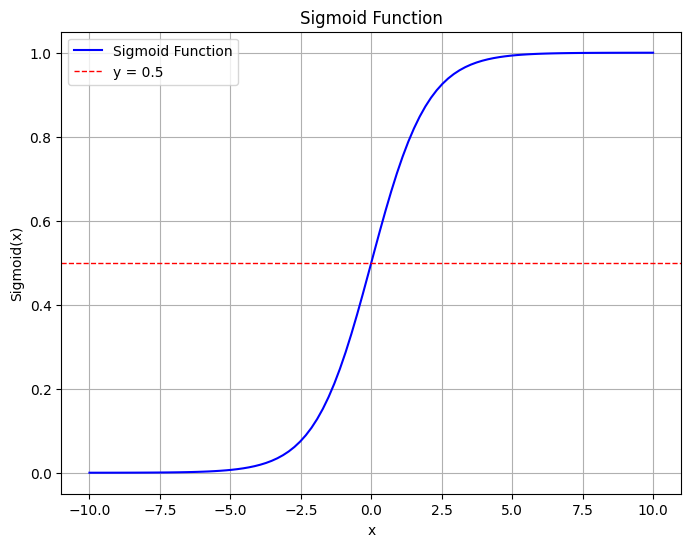

In [5]:
import torch
import matplotlib.pyplot as plt

# 1. 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# 2. 입력 데이터 생성 (x 값 범위: -10부터 10까지)
x = torch.linspace(-10, 10, 100)  # -10에서 10까지 100개의 값

# 3. 시그모이드 함수 적용
y = sigmoid(x)

# 4. 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), y.numpy(), label="Sigmoid Function", color="blue")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label="y = 0.5")  # 시그모이드 중심선 표시
plt.grid()
plt.legend()
plt.show()


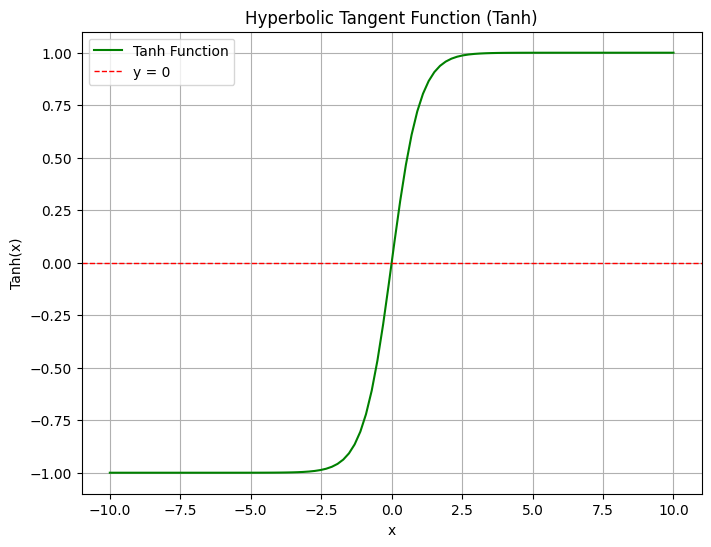

In [6]:
import torch
import matplotlib.pyplot as plt

# 1. 하이퍼볼릭 탄젠트 함수 정의
def tanh(x):
    return torch.tanh(x)

# 2. 입력 데이터 생성 (x 값 범위: -10부터 10까지)
x = torch.linspace(-10, 10, 100)  # -10에서 10까지 100개의 값

# 3. 하이퍼볼릭 탄젠트 함수 적용
y = tanh(x)

# 4. 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), y.numpy(), label="Tanh Function", color="green")
plt.title("Hyperbolic Tangent Function (Tanh)")
plt.xlabel("x")
plt.ylabel("Tanh(x)")
plt.axhline(0, color='red', linestyle='--', linewidth=1, label="y = 0")  # 중심선 표시
plt.grid()
plt.legend()
plt.show()


손실함수 > 경사하강법 기울기 계산 코드

In [7]:
import torch

# 초기값 설정 (학습 파라미터)
X = torch.tensor([4.0], requires_grad=True)  # X 초기값 4.0, 기울기 계산 활성화

# 학습률 설정
learning_rate = 0.1

# 경사하강법 반복
for step in range(20):  # 20번 반복
    # 손실 함수: Y = 3X^2 - 6X + 5
    loss = 3 * X**2 - 6 * X + 5

    # 역전파를 통해 기울기 계산
    loss.backward()

    # 기울기 출력
    print(f"Step {step+1}: X = {X.item():.4f}, Loss = {loss.item():.4f}, Gradient = {X.grad.item():.4f}")

    # 경사하강법 업데이트
    with torch.no_grad():  # autograd 비활성화 (파라미터 업데이트 중에 추적 방지)
        X -= learning_rate * X.grad  # X 업데이트 
        X.grad.zero_()  # 기울기 초기화


Step 1: X = 4.0000, Loss = 29.0000, Gradient = 18.0000
Step 2: X = 2.2000, Loss = 6.3200, Gradient = 7.2000
Step 3: X = 1.4800, Loss = 2.6912, Gradient = 2.8800
Step 4: X = 1.1920, Loss = 2.1106, Gradient = 1.1520
Step 5: X = 1.0768, Loss = 2.0177, Gradient = 0.4608
Step 6: X = 1.0307, Loss = 2.0028, Gradient = 0.1843
Step 7: X = 1.0123, Loss = 2.0005, Gradient = 0.0737
Step 8: X = 1.0049, Loss = 2.0001, Gradient = 0.0295
Step 9: X = 1.0020, Loss = 2.0000, Gradient = 0.0118
Step 10: X = 1.0008, Loss = 2.0000, Gradient = 0.0047
Step 11: X = 1.0003, Loss = 2.0000, Gradient = 0.0019
Step 12: X = 1.0001, Loss = 2.0000, Gradient = 0.0008
Step 13: X = 1.0001, Loss = 2.0000, Gradient = 0.0003
Step 14: X = 1.0000, Loss = 2.0000, Gradient = 0.0001
Step 15: X = 1.0000, Loss = 2.0000, Gradient = 0.0000
Step 16: X = 1.0000, Loss = 2.0000, Gradient = 0.0000
Step 17: X = 1.0000, Loss = 2.0000, Gradient = 0.0000
Step 18: X = 1.0000, Loss = 2.0000, Gradient = 0.0000
Step 19: X = 1.0000, Loss = 2.0000,

손실함수 > 크로스 엔트로피 오차

구글링: [딥러닝 기초개념] 손실함수, velog, 박나연, 22.3.27

역전파(Backpropagation)를 통해 예측값이 실제값과 다를 경우 손실을 계산하고, 이를 기반으로 가중치를 업데이트하는 과정을 보여주는 PyTorch 코드

2.1 데이터

X: 입력 데이터.

Y: 목표값(정답 레이블).
이 예제에서는 

Y=2X라는 관계를 학습하는 모델을 만듭니다.


2.2 모델
nn.Linear(1, 1): 단층 신경망으로, 입력 한 개와 출력 한 개의 연결 가중치와 편향을 학습합니다.

2.3 손실 함수
nn.MSELoss: 평균 제곱 오차(MSE)를 사용하여 예측값과 실제값의 차이를 평가합니다.

2.4 옵티마이저
optim.SGD: 경사하강법(Stochastic Gradient Descent)으로 가중치와 편향을 업데이트합니다.

3. 역전파 및 가중치 업데이트 과정
순전파 (Forward Pass)
모델의 가중치 (W)와 편향 (𝑏)를 사용하여 예측값을 계산

손실 계산
예측값 Y^ 와 실제값 Y의 차이로 손실 함수 
𝐿을 계산

역전파 (Backward Pass)
손실 L에 대해 W와 b의 기울기를 계산:

가중치 업데이트
경사하강법(SGD)을 사용하여 가중치와 편향을 갱신: W = W - w기울기

기울기 초기화
optimizer.zero_grad()로 이전 단계의 기울기를 초기화.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 데이터 정의
# 입력 데이터 (X)와 실제값 (Y)
X = torch.tensor([[1.0], [2.0], [3.0]], requires_grad=False)  # 입력 데이터
Y = torch.tensor([[2.0], [4.0], [6.0]], requires_grad=False)  # 실제값 (목표값)

# 2. 단층 신경망 모델 정의
model = nn.Linear(1, 1)  # 입력 크기=1, 출력 크기=1

# 3. 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()  # 손실 함수: 평균 제곱 오차 (MSE)
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 경사하강법 옵티마이저 (학습률=0.1)

# 4. 학습 루프
for epoch in range(10):  # 10번 반복 학습
    # 4.1 예측값 계산 (순전파)
    predictions = model(X)  # 예측값

    # 4.2 손실 계산
    loss = criterion(predictions, Y)

    # 4.3 역전파 수행 (기울기 계산) W', b'를 계산
    loss.backward()

    # 4.4 가중치 업데이트
    optimizer.step()  # 가중치 갱신
    optimizer.zero_grad()  # 기울기 초기화

    # 4.5 결과 출력
    print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}, Weights = {model.weight.data.numpy()[0][0]:.4f}, Bias = {model.bias.data.numpy()[0]:.4f}")


Epoch 1: Loss = 12.3703, Weights = 1.7885, Bias = 0.8844
Epoch 2: Loss = 0.2428, Weights = 1.6321, Bias = 0.7921
Epoch 3: Loss = 0.0934, Weights = 1.6586, Bias = 0.7808
Epoch 4: Loss = 0.0873, Weights = 1.6649, Bias = 0.7612
Epoch 5: Loss = 0.0831, Weights = 1.6732, Bias = 0.7430
Epoch 6: Loss = 0.0792, Weights = 1.6810, Bias = 0.7251
Epoch 7: Loss = 0.0754, Weights = 1.6887, Bias = 0.7077
Epoch 8: Loss = 0.0718, Weights = 1.6962, Bias = 0.6907
Epoch 9: Loss = 0.0684, Weights = 1.7035, Bias = 0.6741
Epoch 10: Loss = 0.0652, Weights = 1.7106, Bias = 0.6579


In [9]:
import torch
USE_CUDA =torch.cuda.is_available()
device =torch.device('cuda:0'if USE_CUDA else 'cpu')
print('CUDA 사용 가능 여부 :', USE_CUDA)
print('현재 사용 device :', device)
print('CUDA Index :', torch.cuda.current_device())
print('GPU 이름 :', torch.cuda.get_device_name())
print('GPU 개수 :', torch.cuda.device_count())

CUDA 사용 가능 여부 : True
현재 사용 device : cuda:0
CUDA Index : 0
GPU 이름 : NVIDIA GeForce RTX 2070
GPU 개수 : 1
